<a href="https://colab.research.google.com/github/jimil-03/Projectxplore/blob/main/Taxi_fare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [181]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [182]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [183]:
df.shape

(50000, 8)

In [184]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [185]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [187]:
# There is no missing value so going for correlations directly

In [188]:
corr=df.corr()
corr

<ipython-input-188-7d5195e2bf4d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
amount,1.000000,0.005944,-0.007338,0.004286,-0.005442,0.016583
longitude_of_pickup,0.005944,1.000000,-0.950588,0.956131,-0.946968,-0.005604
latitude_of_pickup,-0.007338,-0.950588,1.000000,-0.911123,0.928189,0.003237
longitude_of_dropoff,0.004286,0.956131,-0.911123,1.000000,-0.982117,-0.004936
latitude_of_dropoff,-0.005442,-0.946968,0.928189,-0.982117,1.000000,0.002958
no_of_passenger,0.016583,-0.005604,0.003237,-0.004936,0.002958,1.000000


<Axes: >

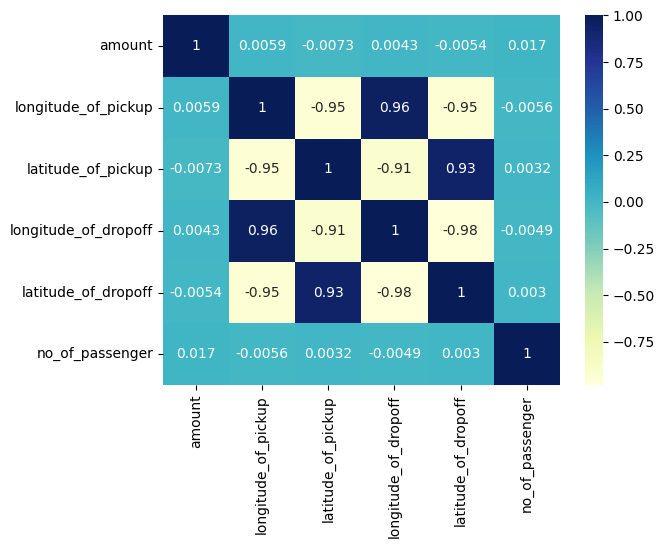

In [189]:
sns.heatmap(corr,annot=True,cmap="YlGnBu")

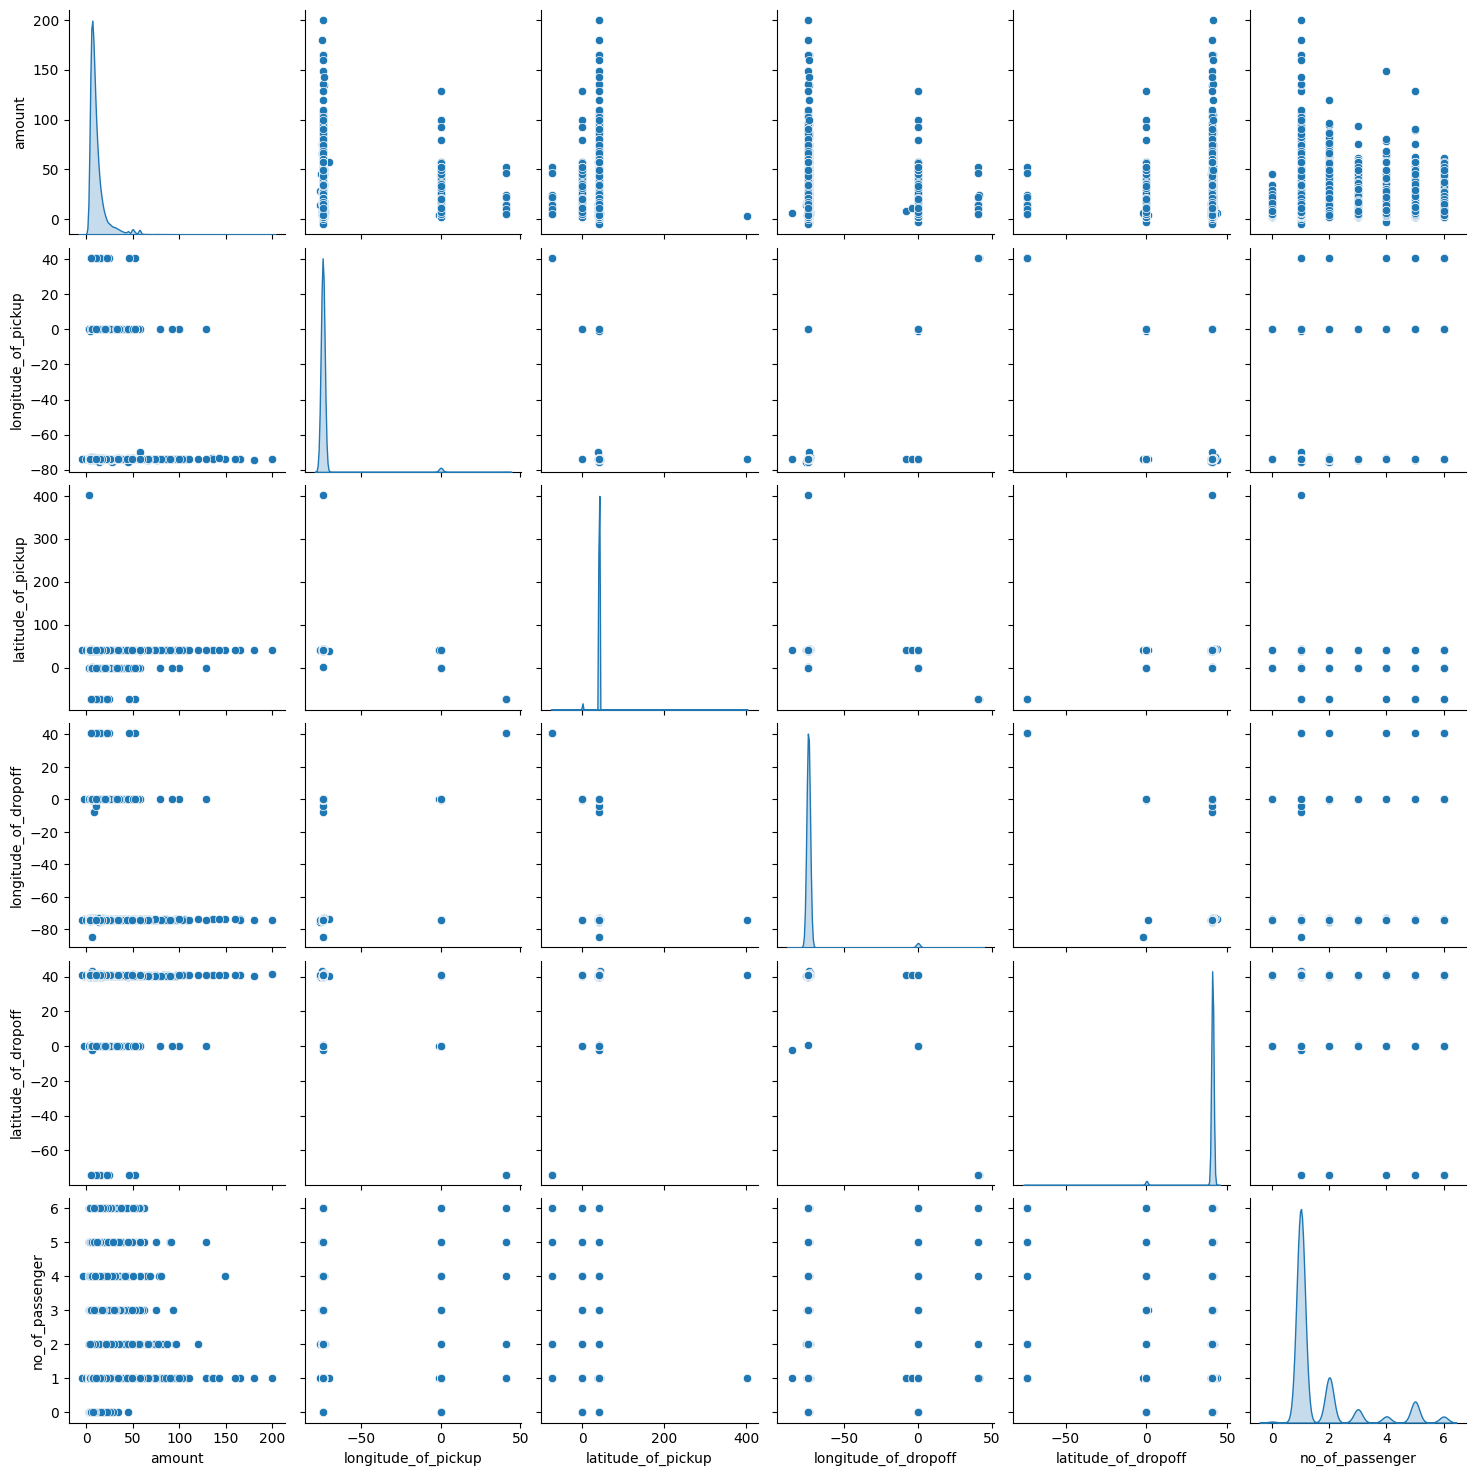

In [190]:
sns.pairplot(df,diag_kind='kde')

In [191]:
 #Although correlation is a good score for many of the attributes but due the catagorical based data one can't find it useful.

In [192]:
# Removing the outliers in the dataset

In [193]:
column=['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff']

In [194]:
Q1=df.longitude_of_pickup.quantile(0.25)
Q3=df.longitude_of_pickup.quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

-73.992062 -73.96714800000001 0.02491399999999544


In [195]:
low=Q1-1.5*IQR
high=Q3+1.5*IQR
low,high

(-74.029433, -73.92977700000002)

In [196]:
df["longitude_of_pickup"]=np.where(df["longitude_of_pickup"]<high,high,df["longitude_of_pickup"])

In [197]:
df["longitude_of_pickup"]=np.where(df["longitude_of_pickup"]<low,low,df["longitude_of_pickup"])

<Axes: >

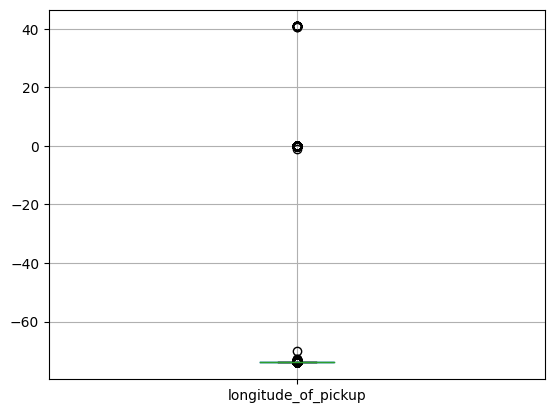

In [198]:
df.boxplot(column=["longitude_of_pickup"])

In [199]:
Q1=df.latitude_of_pickup.quantile(0.25)
Q3=df.latitude_of_pickup.quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

40.73488 40.767360499999995 0.03248049999999836


In [200]:
low=Q1-1.5*IQR
high=Q3+1.5*IQR
low,high

(40.68615925, 40.816081249999996)

In [201]:
df["latitude_of_pickup"]=np.where(df["latitude_of_pickup"]>high,high,df["latitude_of_pickup"])

In [202]:
df["latitude_of_pickup"]=np.where(df["latitude_of_pickup"]<low,low,df["latitude_of_pickup"])

<Axes: >

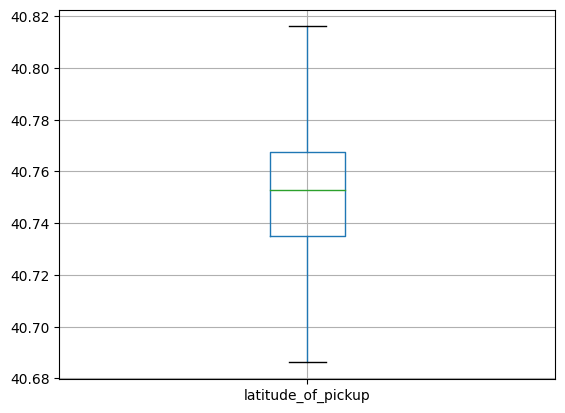

In [203]:
df.boxplot(column=["latitude_of_pickup"])

In [204]:
Q1=df.longitude_of_dropoff.quantile(0.25)
Q3=df.longitude_of_dropoff.quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

-73.991152 -73.96358375 0.027568250000001626


In [205]:
low=Q1-1.5*IQR
high=Q3+1.5*IQR
low,high

(-74.032504375, -73.922231375)

In [206]:
df["longitude_of_dropoff"]=np.where(df["longitude_of_dropoff"]>high,high,df["longitude_of_dropoff"])

In [207]:
df["longitude_of_dropoff"]=np.where(df["longitude_of_dropoff"]<low,low,df["longitude_of_dropoff"])

<Axes: >

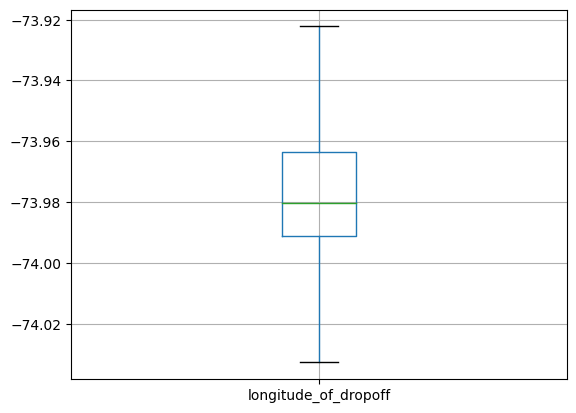

In [208]:
df.boxplot(column=["longitude_of_dropoff"])

In [209]:
Q1=df.latitude_of_dropoff.quantile(0.25)
Q3=df.latitude_of_dropoff.quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

40.7343715 40.768167 0.03379549999999654


In [210]:
low=Q1-1.5*IQR
high=Q3+1.5*IQR
low,high

(40.68367825000001, 40.81886024999999)

In [211]:
df["latitude_of_dropoff"]=np.where(df["latitude_of_dropoff"]>high,high,df["latitude_of_dropoff"])

In [212]:
df["latitude_of_dropoff"]=np.where(df["latitude_of_dropoff"]<low,low,df["latitude_of_dropoff"])

<Axes: >

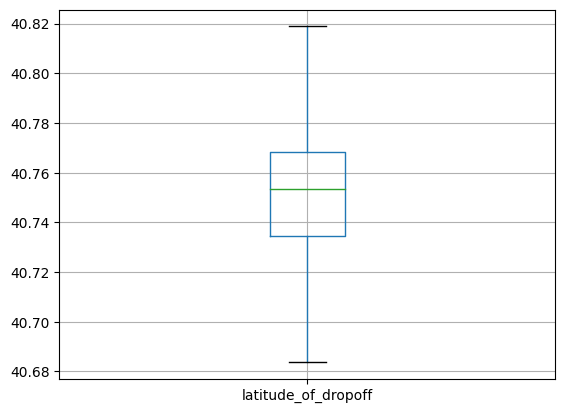

In [213]:
df.boxplot(column=["latitude_of_dropoff"])

In [214]:
df.head(5)


,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.922231,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-73.929777,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.929777,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.929777,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.929777,40.768008,-73.956655,40.783762,1


In [215]:
# Now let us deal with the outliers in amount and number of passenger

In [216]:
df=df[(df.no_of_passenger>0)]     #Number of passengers cann't be 0

In [217]:
Q1=df.amount.quantile(0.25)
Q3=df.amount.quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

6.0 12.5 6.5


In [218]:
low=0.5               #taking the lower threshold as 0.5, Q1-1.5*IQR is coming to be -ve
high=Q3+1.5*IQR
low,high

(0.5, 22.25)

In [ ]:
df["amount"]=np.where(df["amount"]>high,high,df["amount"])

In [ ]:
df["amount"]=np.where(df["amount"]<low,low,df["amount"])

<Axes: >

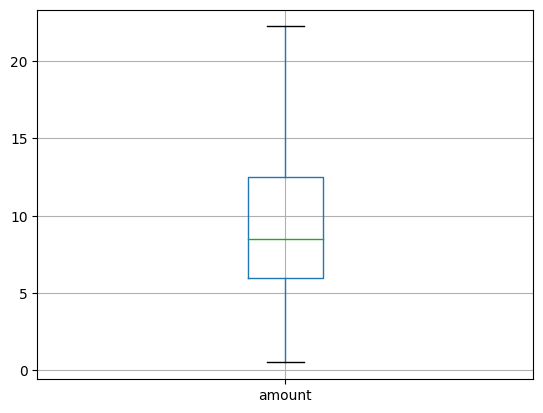

In [221]:
df.boxplot(column=["amount"])

In [222]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,49835.000000,49835.000000,49835.000000,49835.000000,49835.000000,49835.000000
mean,10.110979,-72.462102,40.750272,-73.976017,40.750484,1.673362
std,5.464671,10.383515,0.025700,0.022830,0.028524,1.287744
min,0.500000,-73.929777,40.686159,-74.032504,40.683678,1.000000
25%,6.000000,-73.929777,40.734888,-73.991152,40.734378,1.000000
50%,8.500000,-73.929777,40.752685,-73.980087,40.753375,1.000000
75%,12.500000,-73.929777,40.767367,-73.963611,40.768163,2.000000
max,22.250000,40.783472,40.816081,-73.922231,40.818860,6.000000


In [223]:
# Now the dataset is free of any outliers now removing duplicates

In [ ]:
df.drop_duplicates(inplace=True)

In [225]:
# dropping the unnecessary data columns which are date_time_of_pickup,unique_id

In [ ]:
column=['date_time_of_pickup','unique_id']
df.drop(column,axis=1,inplace=True)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49835 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                49835 non-null  float64
 1   longitude_of_pickup   49835 non-null  float64
 2   latitude_of_pickup    49835 non-null  float64
 3   longitude_of_dropoff  49835 non-null  float64
 4   latitude_of_dropoff   49835 non-null  float64
 5   no_of_passenger       49835 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 2.7 MB


In [228]:
# There are only int and float datatypes hence no need of encoding

In [229]:
x_ns=df.drop(['amount'],axis=1)        #not standardised
y_ns=df['amount']      #not standardised

In [230]:
x_ns_train,x_ns_test,y_ns_train,y_ns_test=train_test_split(x_ns,y_ns,test_size=0.2)

In [231]:
x_ns_train.shape

(39868, 5)

In [232]:
x_ns_test.shape

(9967, 5)

In [233]:
# Linear Regression without standardisation

In [234]:
model1=LinearRegression(n_jobs=10)

In [235]:
model1.fit(x_ns_train,y_ns_train)

LinearRegression(n_jobs=10)

In [236]:
model1.score(x_ns_train,y_ns_train)


0.11683798945511459

In [237]:
model1.score(x_ns_test,y_ns_test)

0.10655518211888082

In [238]:
# KNN without standardisation

In [239]:
model2=KNeighborsRegressor(n_neighbors=6)


In [240]:
model2.fit(x_ns_train,y_ns_train)

KNeighborsRegressor(n_neighbors=6)

In [241]:
model2.score(x_ns_train,y_ns_train)

0.7530985112285433

In [242]:
model2.score(x_ns_test,y_ns_test)

0.6525207092805863

In [243]:

# SVR without standardisation

In [244]:
model3=SVR(kernel = 'poly')

In [245]:

model3.fit(x_ns_train,y_ns_train)

SVR(kernel='poly')

In [246]:
model3.score(x_ns_train,y_ns_train)

-0.09299399198201974

In [247]:
model3.score(x_ns_test,y_ns_test)

-0.10124483213467905

In [248]:
# Now standardising the dataset for better modelling of the dataset

In [249]:
df_std=df

In [250]:
model_std=StandardScaler()

In [251]:
model_std.fit_transform(df_std)

array([[-1.0267838 , -0.13311705, -1.12661712,  2.35597873, -1.33944593,
        -0.52290573],
       [ 1.24236006, -0.14134806, -1.51635244, -0.14239748,  1.10506188,
        -0.52290573],
       [-0.80718923, -0.14134806,  0.4279272 , -0.66689479,  0.00274403,
         0.25365377],
       ...,
       [-0.58759466, -0.14134806, -0.42197285, -0.9676463 ,  0.31550332,
        -0.52290573],
       [-1.0267838 , -0.14134806,  1.06206424,  0.98850879,  1.02383071,
         0.25365377],
       [ 0.14438723, -0.14134806,  0.52656728,  1.90167027,  0.46702732,
        -0.52290573]])

In [252]:
x=df_std.drop(['amount'],axis=1)
y=df_std['amount']

In [253]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [254]:
x_train.shape

(39868, 5)

In [255]:
x_test.shape

(9967, 5)

In [256]:
# Linear Regression

In [257]:
model4=LinearRegression(n_jobs=15)

In [258]:

model4.fit(x_train,y_train)

LinearRegression(n_jobs=15)

In [259]:
model4.score(x_train,y_train)

0.11703284881747023

In [260]:
model4.score(x_test,y_test)

0.10589325759219692

In [261]:
# KNN Regression

In [262]:
model5=KNeighborsRegressor(n_neighbors=11)

In [263]:
model5.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=11)

In [264]:
model5.score(x_train,y_train)

0.7238697426702276

In [265]:
model5.score(x_test,y_test)

0.6819936345818675

In [266]:
# SVR

In [267]:
model6=SVR()

In [268]:
model6.fit(x_train,y_train)

SVR()

In [269]:
model6.score(x_train,y_train)

-0.09380842323166716

In [270]:
model6.score(x_test,y_test)

-0.09795000209450078

In [271]:
# The models are not fitting properly even after standardising this can be because of uneven values of latitude and longitude so let us take the change in coordinates

In [272]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,-73.844311,40.721319,-73.922231,40.712278,1
1,16.9,-73.929777,40.711303,-73.979268,40.782004,1
2,5.7,-73.929777,40.761270,-73.991242,40.750562,2
3,7.7,-73.929777,40.733143,-73.991567,40.758092,1
4,5.3,-73.929777,40.768008,-73.956655,40.783762,1


In [ ]:
df['longitude_of_pickup']=abs(df['longitude_of_pickup']-df['longitude_of_dropoff'])

In [ ]:
df['latitude_of_pickup']=abs(df['latitude_of_pickup']-df['latitude_of_dropoff'])

In [ ]:
column=['longitude_of_dropoff','latitude_of_dropoff']
df.drop(column,axis=1,inplace=True)

In [276]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,no_of_passenger
0,4.5,0.077920,0.009041,1
1,16.9,0.049491,0.070701,1
2,5.7,0.061465,0.010708,2
3,7.7,0.061790,0.024949,1
4,5.3,0.026878,0.015754,1


In [ ]:
df.rename(columns={'latitude_of_pickup': 'Latitude_change'}, inplace=True)

In [ ]:
df.rename(columns={'longitude_of_pickup': 'Longitude_change'}, inplace=True)

In [279]:
# Now standardising the dataset for better modelling of the dataset

In [280]:
model_std=StandardScaler()

In [281]:
model_std.fit_transform(df)

array([[-1.0267838 , -0.1384512 , -0.56506098, -0.52290573],
       [ 1.24236006, -0.1411911 ,  2.77521768, -0.52290573],
       [-0.80718923, -0.1400371 , -0.47475536,  0.25365377],
       ...,
       [-0.58759466, -0.13937538,  0.03159535, -0.52290573],
       [-1.0267838 , -0.14367932, -0.93998911,  0.25365377],
       [ 0.14438723, -0.14568846, -1.05483489, -0.52290573]])

In [282]:
df.head()

,amount,Longitude_change,Latitude_change,no_of_passenger
0,4.5,0.077920,0.009041,1
1,16.9,0.049491,0.070701,1
2,5.7,0.061465,0.010708,2
3,7.7,0.061790,0.024949,1
4,5.3,0.026878,0.015754,1


In [283]:
x=df.drop(['amount'],axis=1)
y=df['amount']

In [284]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [285]:
x_train.shape

(39868, 3)

In [286]:
x_test.shape

(9967, 3)

In [287]:
# Linear Regression

In [288]:
model7=LinearRegression(n_jobs=7)

In [289]:
model7.fit(x_train,y_train)

LinearRegression(n_jobs=7)

In [290]:
model7.score(x_train,y_train)

0.4510365241752884

In [291]:
model7.score(x_test,y_test)

0.4516164531068121

In [292]:
#KNN

In [293]:
model8=KNeighborsRegressor(n_neighbors=30)

In [294]:
model8.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=30)

In [295]:
model8.score(x_train,y_train)


0.6592903651923299

In [296]:
model8.score(x_test,y_test)

0.6400200518380211

In [297]:
# SVR

In [298]:
model9=SVR(kernel='linear',degree=15)

In [299]:
model9.fit(x_train,y_train)

SVR(degree=15, kernel='linear')

In [300]:
model9.score(x_train,y_train)

0.393376219656446

In [301]:
model9.score(x_test,y_test)


0.39555065546680834

In [302]:
# Decision Tree Regression

In [303]:
model10=DecisionTreeRegressor(max_depth=6,min_samples_leaf=5)

In [304]:
model10.fit(x_train,y_train)


DecisionTreeRegressor(max_depth=6, min_samples_leaf=5)

In [305]:
model10.score(x_train,y_train)

0.6652672723060856

In [306]:
model10.score(x_test,y_test)

0.6632631747468909

In [307]:
# Bagging Regression

In [308]:

model11=BaggingRegressor(n_estimators=5,max_samples=25)

In [309]:
model11.fit(x_train,y_train)

BaggingRegressor(max_samples=25, n_estimators=5)

In [310]:
model11.score(x_train,y_train)

0.45656726435299066

In [311]:
model11.score(x_test,y_test)


0.462314914246685

In [312]:
# Adaboost Regression

In [313]:
model12=AdaBoostRegressor(n_estimators=1,learning_rate=10,loss='exponential',random_state=0)


In [314]:
model12.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=10, loss='exponential', n_estimators=1,
                  random_state=0)

In [315]:
model12.score(x_train,y_train)

0.5450317304489218

In [316]:
model12.score(x_test,y_test)

0.5495569369743786

In [317]:
# Gradient Boost Regression

In [318]:
model13=GradientBoostingRegressor(n_estimators=550)

In [319]:
model13.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=550)

In [320]:
model13.score(x_train,y_train)

0.6923349744881295

In [321]:
model13.score(x_test,y_test)

0.6635205679719187

In [322]:
# Random Forest regression

In [323]:
model14=RandomForestRegressor(max_depth=5)

In [324]:
model14.fit(x_train,y_train)


RandomForestRegressor(max_depth=5)

In [325]:
model14.score(x_train,y_train)

0.6619285511598502

In [326]:
model14.score(x_test,y_test)


0.6642511200106249

In [327]:
# In Taxi Fare Prediction we need to predict a value which ranges from (0,inf) although infinity is not practically possible.
# Hence for such prediction we used regressors which are used to predict better in case of ranges.

In [328]:
# In this Taxi Fare Prediction the data is very small with only three information columns i.e. number of passengers and both coordinates change
# Such small dataset(in terms of columns) may not acheive a very good score as they doesn't have good scope to ommit a non fitting column
# Hence the best fitting model came out to be Gradient Boost Algorithm
# Gradient Boost got a score of 28% vs 23%%
# Gradient Boost got such score as gradient boosting is a tree based regressor which improve its previous error.
# In contrast to Adaboost, the weights of the training instances are not tweaked, instead, each predictor is trained using the residual errors of predecessor as labels.
# Hence for the dataset Taxi Fare Prediction GRADIENT BOOSTING is best possible.